In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

### 1. Import the dataset

In [2]:
df=pd.read_csv('data/311_Service_Requests_from_2010_to_Present.csv')
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [5]:
df.shape

(300698, 53)

### 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [6]:
df['Closed Date'] =  pd.to_datetime(df['Closed Date'])
df['Created Date'] =  pd.to_datetime(df['Created Date'])
df['Request_Closing_Time']=df['Closed Date']-df['Created Date']
Request_Closing_Time=[]
for x in (df["Closed Date"]-df["Created Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
    
df["Request_Closing_Time"]=Request_Closing_Time
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",207.033333


### 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); 
at least 4 major conclusions that you can come up with after generic data mining.

In [7]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

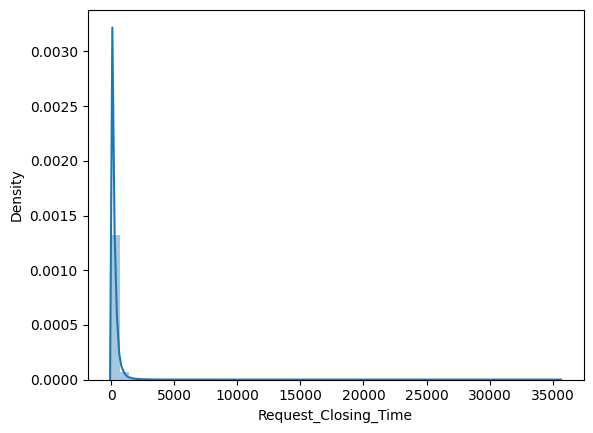

In [8]:
#Univariate Distribution Plot for Request Closing Time
sns.distplot(df["Request_Closing_Time"])
plt.show

In [9]:
print("Total Number of Concerns : ",len(df),"\n")
print("Percentage of Requests took less than 100 hour to get solved   : ",round((len(df)-(df["Request_Closing_Time"]>100).sum())/len(df)*100,2),"%")
print("Percentage of Requests took less than 1000 hour to get solved : ",round((len(df)-(df["Request_Closing_Time"]>1000).sum())/len(df)*100,2),"%")

Total Number of Concerns :  300698 

Percentage of Requests took less than 100 hour to get solved   :  33.32 %
Percentage of Requests took less than 1000 hour to get solved :  97.19 %


From above we can see that the data is heavily skewed. There are lots of outliers. Almost more than 97% of the requests are solved in less than 1000 hours i.e 17 days.

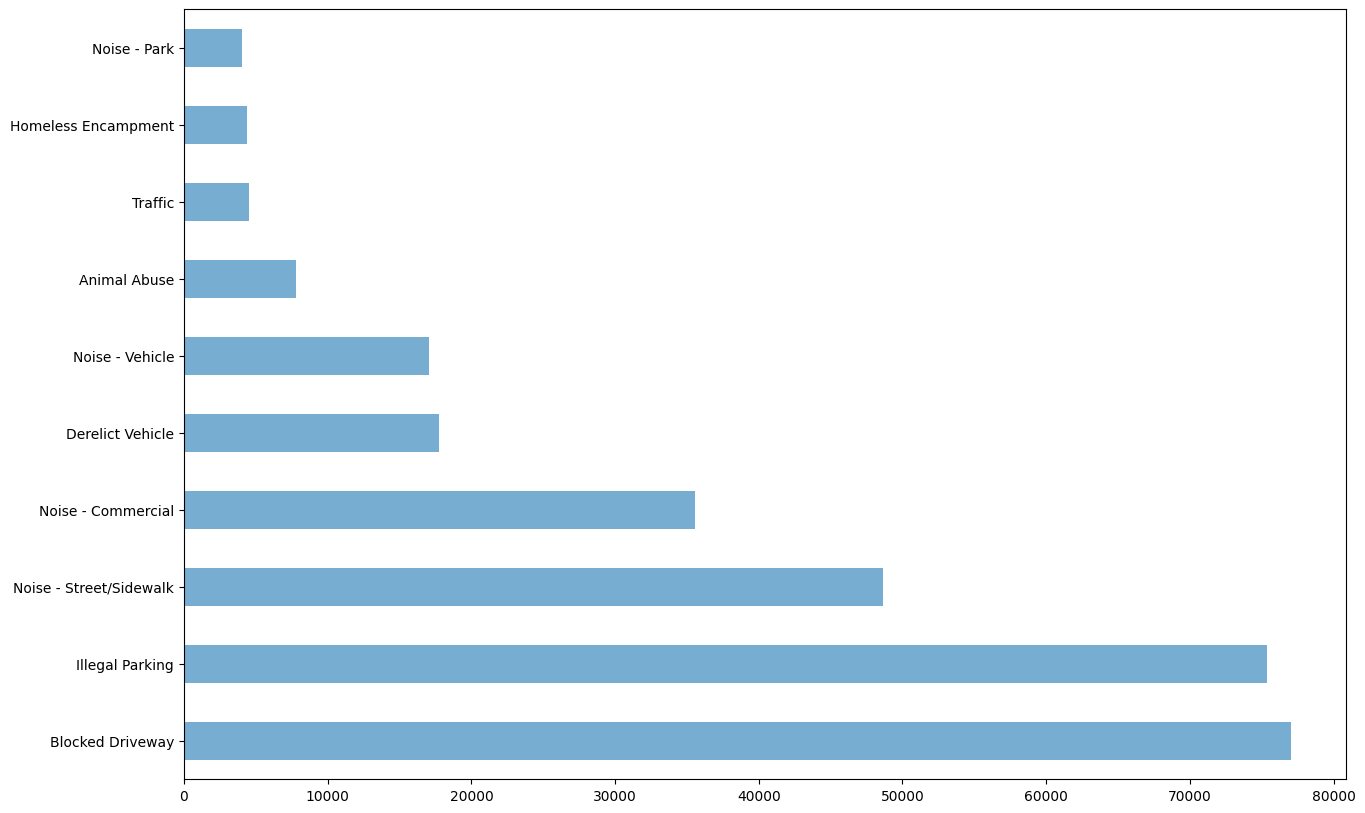

In [10]:
# Count plot to understand the type of the complaint raised
df['Complaint Type'].value_counts()[:10].plot(kind='barh',alpha=0.6,figsize=(15,10))
plt.show()

Almost around 85% of the the requests belongs to transport (Blocked driveway,Illegal Parking, Vehicle Noise, Road Traffic etc ).

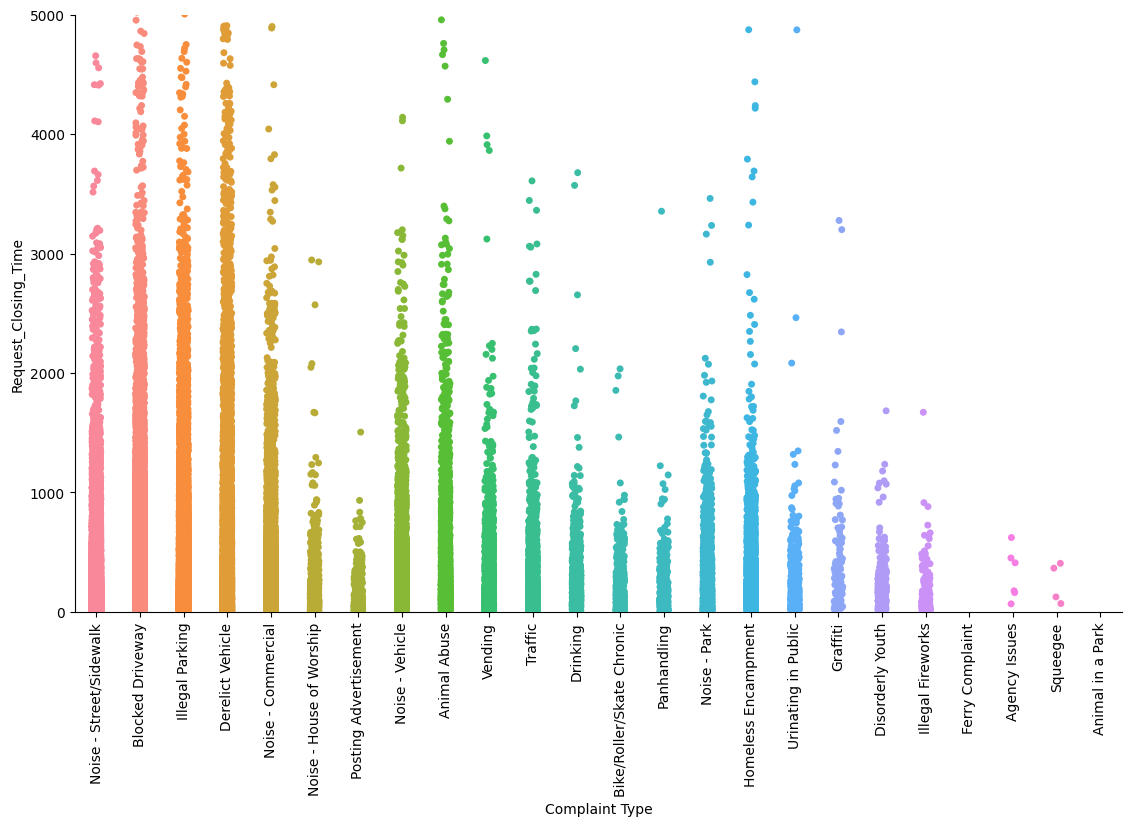

In [11]:
#Categorical Scatter Plot to understand which type of complaints are taking more time to get resolved
g=sns.catplot(x='Complaint Type', y="Request_Closing_Time",data=df)
g.fig.set_figwidth(15)
g.fig.set_figheight(7)
plt.xticks(rotation=90)
plt.ylim((0,5000))
plt.show()

As we have got above that almost around 85% of the the requests belongs to transport (Blocked driveway,Illegal Parking, Vehicle Noise, Road Traffic etc ). From this plot we can understand that most of these issues have taken more time to get resolved. Government should take measure in incresing awareness and find some measures to reduce traffic problems.

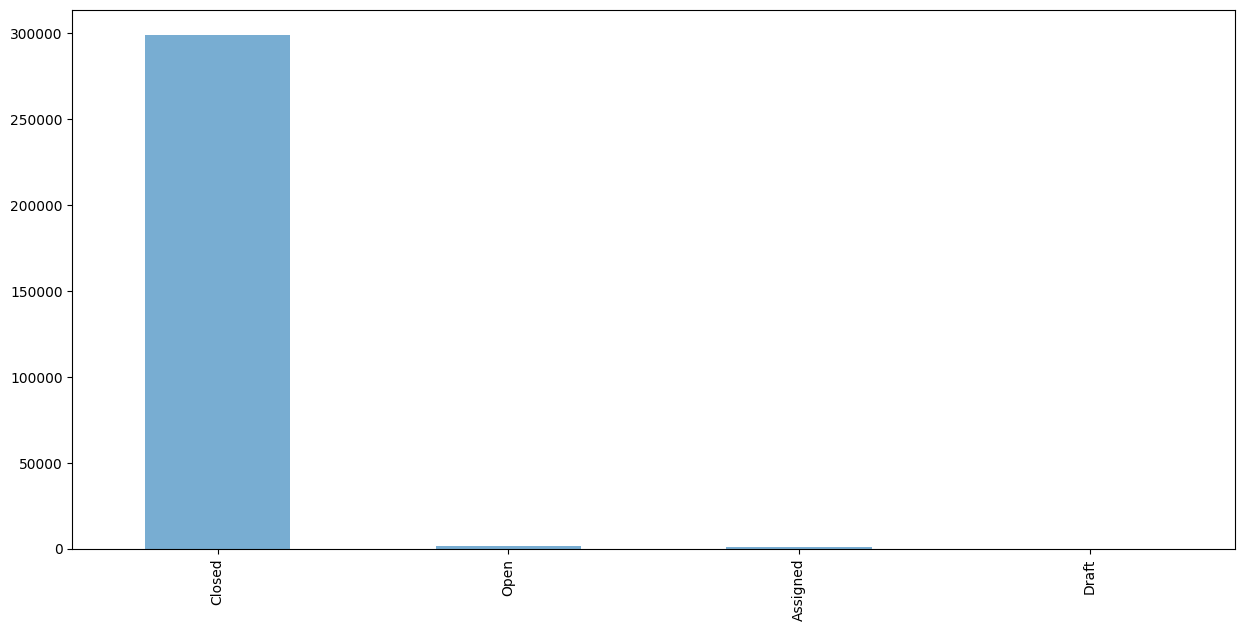

In [12]:
# Count plot to know the status of the requests
df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(15,7))
plt.show()

As of now almost 98% of the cases are closed state.

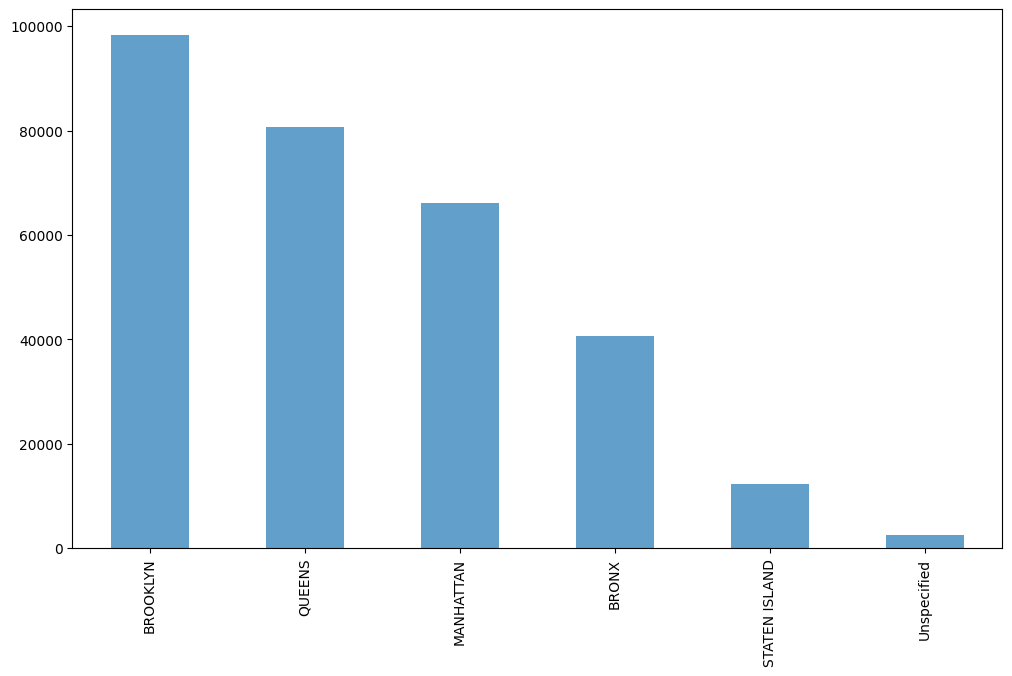

In [13]:
#Count Plot for Coloumn Borough
plt.figure(figsize=(12,7))
df['Borough'].value_counts().plot(kind='bar',alpha=0.7)
plt.show()

In [14]:
#Percentage of cases in each Borough
for x in df["Borough"].unique():
    print("Percentage of Request from ",x," Division : ",round((df["Borough"]==x).sum()/len(df)*100,2))

Percentage of Request from  MANHATTAN  Division :  21.99
Percentage of Request from  QUEENS  Division :  26.82
Percentage of Request from  BRONX  Division :  13.54
Percentage of Request from  BROOKLYN  Division :  32.69
Percentage of Request from  Unspecified  Division :  0.86
Percentage of Request from  STATEN ISLAND  Division :  4.1


In [15]:
#Unique Location Types
df["Location Type"].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', 'Terminal', nan,
       'Ferry', 'Park'], dtype=object)

In [16]:
#Request Closing Time for all location Type sorted in ascending Order
pd.DataFrame(df.groupby("Location Type")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")

,Request_Closing_Time
Location Type,
Subway Station,142.250980
Club/Bar/Restaurant,186.074330
House of Worship,191.833279
Store/Commercial,198.089073
Park/Playground,207.137129
Highway,223.424221
Bridge,229.158333
Roadway Tunnel,266.525714
Street/Sidewalk,268.515306


We see that maximum(mean) time to resolve the complaint is taken in Park,Vacant Lot and Commercial areas whereas the cases in the Subway Station and Restaurent are resolved in very less time

### Handling Missing Values

In [17]:
#Percentage Of Missing Value
pd.DataFrame((df.isnull().sum()/df.shape[0]*100)).sort_values(0,ascending=False)[:20]

,0
School or Citywide Complaint,100.000000
Garage Lot Name,100.000000
Vehicle Type,100.000000
Taxi Pick Up Location,100.000000
Taxi Company Borough,100.000000
Ferry Direction,99.999667
Ferry Terminal Name,99.999335
Road Ramp,99.929165
Bridge Highway Segment,99.929165
Bridge Highway Direction,99.919188


We see that all the data related to school columns are empty which must be because none of the request or complaint are from the school sector. Thus we can go on and remove that column.

In [18]:
#Remove the column with very high percentage of missing value
new_df=df.loc[:,(df.isnull().sum()/df.shape[0]*100)<=50]

In [19]:
print("Old DataFrame Shape :",df.shape)
print("New DataFrame Shape : ",new_df.shape)

Old DataFrame Shape : (300698, 54)
New DataFrame Shape :  (300698, 40)


In [20]:
rem=[]
for x in new_df.columns.tolist():
    if new_df[x].nunique()<=3:
        print(x+ " "*10+" : ",new_df[x].unique())
        rem.append(x)

Agency           :  ['NYPD']
Agency Name           :  ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
Facility Type           :  ['Precinct' nan]
Park Facility Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Number           :  ['Unspecified' 'Q001']
School Region           :  ['Unspecified' nan]
School Code           :  ['Unspecified' nan]
School Phone Number           :  ['Unspecified' '7182176034']
School Address           :  ['Unspecified' 'Grand Central Parkway, near the soccer field']
School City           :  ['Unspecified' 'QUEENS']
School State           :  ['Unspecified' 'NY']
School Zip           :  ['Unspecified' nan]
School Not Found           :  ['N']


We see that all the data above have not much details, are Unspecified. So we can remove those columns to ease our analysis

In [21]:
new_df.drop(rem,axis=1,inplace=True)

In [22]:
#Remove columns that are not needed for our analysis
rem1=["Unique Key","Incident Address","Descriptor","Street Name","Cross Street 1","Cross Street 2","Due Date","Resolution Description","Resolution Action Updated Date","Community Board","X Coordinate (State Plane)","Y Coordinate (State Plane)","Park Borough","Latitude","Longitude","Location"]

new_df.drop(rem1,axis=1,inplace=True)

In [23]:
df=new_df

### 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [24]:
Resolution = df.groupby(['Complaint Type','Borough'])[['Request_Closing_Time']].mean().unstack()
#Resolution = df.groupby(['Complaint Type','City'])[['Request_Closing_Time']].mean().unstack()
Resolution

Request_Closing_Time                          \
Borough                                  BRONX    BROOKLYN   MANHATTAN   
Complaint Type                                                           
Agency Issues                              NaN         NaN         NaN   
Animal Abuse                        440.129670  289.950362  221.109082   
Animal in a Park                           NaN         NaN         NaN   
Bike/Roller/Skate Chronic           207.538333  300.282282  173.533481   
Blocked Driveway                    375.705840  264.647022  213.446226   
Derelict Vehicle                    553.654448  356.849385  255.960459   
Disorderly Youth                    254.304497  249.031019  144.471014   
Drinking                            347.614894  212.433658  183.465311   
Ferry Complaint                            NaN         NaN         NaN   
Graffiti                            533.942593  494.592248  303.837879   
Homeless Encampment                 447.186856  281.689187  222.132589   
Illegal Fireworks                   336.491667  140.375137  103.214815   
Illegal Parking                     394.850575  256.334473  203.417100   
Noise - Commercial                  281.841054  179.165509  164.059543   
Noise - House of Worship            273.572785  184.191618  138.308162   
Noise - Park                        281.911517  189.031876  176.693457   
Noise - Street/Sidewalk             313.599614  197.749994  164.140429   
Noise - Vehicle                     333.647576  197.006591  157.315494   
Panhandling                         852.823684  258.988776  208.465976   
Posting Advertisement               207.719608  201.657037  177.322358   
Squeegee                                   NaN         NaN  242.737500   
Traffic                             295.709430  186.228069  159.331054   
Urinating in Public                 323.406209  233.958824  173.655511   
Vending                             409.541821  271.686278  198.366215   

                                                                   
Borough                        QUEENS STATEN ISLAND   Unspecified  
Complaint Type                                                     
Agency Issues                     NaN           NaN    315.619444  
Animal Abuse               324.833271    298.170347    204.583333  
Animal in a Park                  NaN           NaN  20210.083333  
Bike/Roller/Skate Chronic  286.033333    244.642857    351.600000  
Blocked Driveway           272.256521    244.275218    507.980117  
Derelict Vehicle           509.571129    302.374670    854.906159  
Disorderly Youth           199.531073    233.610870           NaN  
Drinking                   233.876237    209.589905    396.283333  
Ferry Complaint                   NaN           NaN           NaN  
Graffiti                   394.070721    573.741667           NaN  
Homeless Encampment        359.887859    298.782629           NaN  
Illegal Fireworks          141.523874    224.148333           NaN  
Illegal Parking            285.050384    230.762775    580.653823  
Noise - Commercial         226.435367    180.250147    627.319608  
Noise - House of Worship   215.290357    150.202941           NaN  
Noise - Park               229.134932    176.015174    515.126190  
Noise - Street/Sidewalk    217.494210    178.055467    506.086567  
Noise - Vehicle            222.380510    194.258755    284.480556  
Panhandling                235.351042    280.198611           NaN  
Posting Advertisement      309.806667     92.522362           NaN  
Squeegee                          NaN           NaN           NaN  
Traffic                    255.497229    212.713384           NaN  
Urinating in Public        248.838810    148.716667           NaN  
Vending                    286.033648    256.289333    307.033333

### 5. Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related?

In [25]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

### 𝐻0: there is no significant different in mean of Time_Elapsed (Request_Closing_Time) for different Complaint
### 𝐻1: there is signficant different in mean of Time_Elapsed (Request_Closing_Time) for different Complaint

In [26]:
anova_df=pd.DataFrame()
anova_df["Request_Closing_Time"]=df["Request_Closing_Time"]
anova_df["Complaint"]=df["Complaint Type"]

anova_df.dropna(inplace=True)
anova_df

,Request_Closing_Time,Complaint
0,55.250000,Noise - Street/Sidewalk
1,86.266667,Blocked Driveway
2,291.516667,Blocked Driveway
3,465.233333,Illegal Parking
4,207.033333,Illegal Parking
...,...,...
300692,38.483333,Noise - Commercial
300694,120.516667,Blocked Driveway
300695,187.283333,Noise - Commercial
300696,245.550000,Noise - Commercial


In [27]:
anova_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298534 entries, 0 to 300697
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Request_Closing_Time  298534 non-null  float64
 1   Complaint             298534 non-null  object 
dtypes: float64(1), object(1)
memory usage: 6.8+ MB


In [28]:
lm=ols("Request_Closing_Time~Complaint",data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,22.0,1.455049e+09,6.613860e+07,514.177089,0.0
Residual,298511.0,3.839747e+10,1.286300e+05,NaN,NaN


Since p value for the Complaint is less that 0.01 thus we accept alternate hypothesis i.e there is significant difference in the mean response time w.r.t different type of complaint.

### 𝐻0: Complaint Type and Location Type are independent
### 𝐻1: Complaint Type and Location Type are related

In [29]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=df["Location Type"]
chi_sq["Complaint Type"]=df["Complaint Type"]
chi_sq.dropna(inplace=True)

In [30]:
data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Complaint Type"])

In [31]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

Dependent (reject H0)


Maximum Complaints are raised in road and parking (vehicle) related sectors<p>
On an average complains are closed in an span of 150 to 300 hours<p>
Transport and Road related issues are taking more time to get resolved as number of these cases are quite high.<p>
Number of cases from Borough goes as follows BROOKLYN > QUEENS > MANHATTAN > BRONX > STATEN ISLAND<p>
Complaint Type are Depentent on Location Type.<p>
Time taken for solving different complaint type are different<p>